![MSE Logo](https://moodle.msengineering.ch/pluginfile.php/1/core_admin/logo/0x150/1643104191/logo-mse.png)

# AnTeDe Lab 1: Text Segmentation with NLTK

## Objectives
The goal of the first [AnTeDe](https://moodle.msengineering.ch/course/view.php?id=1869) lab is to run simple operations for text analysis using the [NLTK](http://www.nltk.org/) toolkit.  You will use the environment that you set up following the instructions of the previous notebook: [Python 3](https://www.python.org/) with [Jupyter](https://jupyter.org/) notebooks.  

You will use NLTK functions to get texts from the web and segment (split) them into sentences and words (also called *tokens*).  You will also experiment with extracting statistics about the texts.

To submit your practical work, please execute anew all cells of this notebook via "Runtime > Restart and run all", then save it, zip it, and submit it as homework on the [AnTeDe Moodle page](https://moodle.msengineering.ch/course/view.php?id=1869).

## NLTK: the Natural Language (Processing) Toolkit

Please add NLTK to your Python installation, by following the installation instructions at the [NLTK website](http://www.nltk.org/install.html).  A good way to get started is to look at [Chapter 1](http://www.nltk.org/book/ch01.html) of the [NLTK book (NLP with Python)](http://www.nltk.org/book/) and to try some of the instructions there.  

The online edition is updated for Python 3, but the printed book, also available in PDF on some websites, is only for Python 2 ([Natural Language Processing with Python: Analyzing Text with the Natural Language Toolkit, Steven Bird, Ewan Klein, and Edward Loper, O'Reilly Media, 2009](http://shop.oreilly.com/product/9780596516499.do)). 

To use NLTK in Jupyter, all you need is to `import nltk` before you need it.  You must use the prefix `nltk.` unless you write for instance: `from nltk.book import *` which will import and define several text collections (a.k.a corpora).  NLTK can download from the associated website a large number of corpora.  NLTK has a download manager which can be called from a Python interpreter (not a notebook) using `nltk.download()`.

In [10]:
import nltk
#from nltk.book import *

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Matthias\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

To verify your NLTK library, please define a list of words called `sentence1`, print its length (`len()`) and use `nltk.bigrams` to generate all bigrams from it, i.e. pairs of consecutive words.  You can see an example in [Sec. 3.3 of Ch. 1 of the NLTK book](http://www.nltk.org/book/ch01.html#collocations-and-bigrams).  Please also sort bigrams alphabetically.

In [11]:
sentence1: list[str] = ['hello', 'these', 'are', 'some', 'words']

print(f'{len(sentence1) = }')

bigram_generator = nltk.bigrams(sentence1)
bigrams = list(bigram_generator)
print(f'Sorted bigrams: {sorted(bigrams)}')


len(sentence1) = 5
Sorted bigrams: [('are', 'some'), ('hello', 'these'), ('some', 'words'), ('these', 'are')]


## Using NLTK to download, tokenize, and save a text

Using inspiration from [Chapter 3 (3.1. Processing Raw Text) of the NLTK book](http://www.nltk.org/book/ch03.html), get a book from the Gutenberg Project in text format.   What is its length? Are these bytes or characters? If you are curious about "special" characters, you can refer to [Python's documentation of Unicode support](https://docs.python.org/3.8/howto/unicode.html).)

In [12]:
from urllib import request
url = "http://www.gutenberg.org/files/2554/2554-0.txt"
response = request.urlopen(url)
raw = response.read().decode('utf8')

print(f'{len(raw) = }')
print(type(raw))
print('Type of response is bytes!')


len(raw) = 1176812
<class 'str'>
Type of response is bytes!


We now want to keep only the meaningful text from the book, without the header and the final license. Determine, either by spotting the position of certain initial and final strings, or simply by trial and error, how much your should trim from the beginning and from the end in order to keep only the actual text of the book. Then save the result into a new string. What is its length?

In [13]:
def find_nth(text, needle, n):
    start = text.find(needle)
    while start >= 0 and n > 1:
        start = text.find(needle, start+len(needle))
        n -= 1
    return start


starting_index = find_nth(raw, 'CRIME AND PUNISHMENT', 3)
ending_index = raw.find(
    '*** END OF THE PROJECT GUTENBERG EBOOK CRIME AND PUNISHMENT ***')

book_text = raw[starting_index:ending_index-1]
print(f'Length of actual text: {len(book_text) = }')


Length of actual text: len(book_text) = 1152503


We will first segment the text into sentences, then tokenize each sentence, i.e. segment it into tokens (words and punctuations).  We can also tokenize the entire text without segmenting it into sentences first.  We will use the following NLTK functions:
* `nltk.sent_tokenize(...)` (documented [here](https://www.nltk.org/api/nltk.tokenize.html#nltk.tokenize.word_tokenize)) (usually, only word segmentation is called *tokenization*, but NLTK uses this name for both functions)
* `nltk.word_tokenize(...)` (documented [here](https://www.nltk.org/api/nltk.tokenize.html#nltk.tokenize.sent_tokenize))

**Segment the text into sentences with NLTK,** display the number of sentences, and display five sentences.  What do you think about the quality of the segmentation?  If you think that some special characters degrade the results, you can go back and replace them in the full text with `.replace('s1', 's2')`.

In [14]:
sentences = nltk.sent_tokenize(book_text)

In [15]:
import random
print(f'Number of sentences = {len(sentences)}')

five_random_picks = [random.randint(0, len(sentences)) for _ in range(5)]
five_random_sentences = [sentences[pick] for pick in five_random_picks]

print(f'5 random sentences:')
for i, sentence in enumerate(five_random_sentences):
    print(f'Sentence {i + 1}: {sentence}\n')

Number of sentences = 11906
5 random sentences:
Sentence 1: This is no place for you in the crowd.

Sentence 2: The horses are young and ready to take fright... they started,
he screamed... that made them worse.

Sentence 3: Mitka!

Sentence 4: It was a
long while since he had received a letter, but another feeling also
suddenly stabbed his heart.

Sentence 5: He read it all in her face; so she
must have had that thought already, perhaps many times, and earnestly
she had thought out in her despair how to end it and so earnestly, that
now she scarcely wondered at his suggestion.



In [16]:
# # If needed, here is how to save the result, with one sentence per line.
# import os
# filename1 = "sample_text_1.txt"
# # For a local file, this is the relative path with respect to the notebook
# # In Colab, use a path like this: /content/gdrive/My Drive/sample_text_1.txt
# if os.path.exists(filename1): 
#     os.remove(filename1)
# fd = open(filename1, 'a', encoding='utf8')
# for s in sentences1:
#     fd.write(s + '\r\n')
# fd.close()

**Segment each sentence into tokens (i.e., words and punctuations),**  store the result in a new variable (a list of lists), and display the same five sentences as above.

In [17]:
tokens_per_sentence = [nltk.word_tokenize(sentence) for sentence in sentences]

for i, pick in enumerate(five_random_picks):
    print(f'Tokenized sentence {i+1}: {tokens_per_sentence[pick]}')


Tokenized sentence 1: ['This', 'is', 'no', 'place', 'for', 'you', 'in', 'the', 'crowd', '.']
Tokenized sentence 2: ['The', 'horses', 'are', 'young', 'and', 'ready', 'to', 'take', 'fright', '...', 'they', 'started', ',', 'he', 'screamed', '...', 'that', 'made', 'them', 'worse', '.']
Tokenized sentence 3: ['Mitka', '!']
Tokenized sentence 4: ['It', 'was', 'a', 'long', 'while', 'since', 'he', 'had', 'received', 'a', 'letter', ',', 'but', 'another', 'feeling', 'also', 'suddenly', 'stabbed', 'his', 'heart', '.']
Tokenized sentence 5: ['He', 'read', 'it', 'all', 'in', 'her', 'face', ';', 'so', 'she', 'must', 'have', 'had', 'that', 'thought', 'already', ',', 'perhaps', 'many', 'times', ',', 'and', 'earnestly', 'she', 'had', 'thought', 'out', 'in', 'her', 'despair', 'how', 'to', 'end', 'it', 'and', 'so', 'earnestly', ',', 'that', 'now', 'she', 'scarcely', 'wondered', 'at', 'his', 'suggestion', '.']


How many tokens are there in total?

In [18]:
total_tokens = sum(len(sentence) for sentence in tokens_per_sentence)
total_tokens

252743

**Tokenize the initial text without segmenting it into sentences,** and compare the resulting total number of tokens with the one obtained above.

In [19]:
tokens_from_complete_text = nltk.word_tokenize(book_text)
len(tokens_from_complete_text)


252743

**Find the size of the vocabulary of your text** (the unique *word types*) by converting the list of words (the *tokens*) to a Python `set`.  Note that these *types* include punctuations and other symbols found through tokenization, and upper/lower case letters are different.  Display all words longer than 15 characters and not containing a hyphen (-).

In [20]:
# Please write your Python code in this cell and execute it.
unique_words = set(tokens_from_complete_text)

unique_words_matching_constraints = [word for word in unique_words if len(word) > 15 and '-' not in word]
unique_words_matching_constraints

['disproportionately',
 'indistinguishable',
 'indiscriminately',
 '_psychologically_',
 'disproportionate',
 'superciliousness',
 'enthusiastically',
 'circumstantially',
 'misunderstanding']

**What is the type-token ratio (TTR) of your text?**

In [21]:
print("Type to token ratio: ", len(unique_words)/len(tokens_from_complete_text))

Type to token ratio:  0.043581820268019295


## Computing statistics with NLTK
You can create a `nltk.Text` object from the tokens of the text, without sentence segmentation.  This enables you  to compute statistics using NLTK functions.  [Chapter 1 of the NLTK book](http://www.nltk.org/book/ch01.html) provides examples of operations than can be done on texts.

NLTK Texts can in fact store one of the following text formats:
1. a string;
2. the list of all words (list of strings);
3. the list of all sentences (list of lists of strings).

However, only option (2) allows the correct use of counting methods for NLTK Texts.   Note that `nltk.word_tokenize()` and `nltk.sent_tokenize()` only apply to strings, not to `ntlk.Text` objects, even if they store a string.

**Create a `nltk.Text` object** from the tokenized version of your text (without sentence segmentation).

In [22]:
nltk_text = nltk.Text(tokens_from_complete_text)


NLTK can compute word frequencies for a given text, yielding a new object called a frequency distribution (`FreqDist`): see [Sec. 3.1 of Ch. 1 of the NLTK book](http://www.nltk.org/book/ch01.html#frequency-distributions).  Using such an object, we can get the most frequent words.  

**Construct the frequency distribution** of your text and use the `most_common` method of the object to display words longer than 4 characters among the 50 most frequent words.

In [23]:
frequency_distribution = nltk.FreqDist(nltk_text)

frequency_distribution.most_common(50)

most_common_words_longer_than_4 = [word for (word, _) in frequency_distribution.most_common(50) if len(word) > 4]
most_common_words_longer_than_4

['Raskolnikov']

**Display the cumulative frequency plot** of the 50 most frequent words of your text, for instance using examples from [Sec. 3.1 of Ch. 1 of the NLTK book](http://www.nltk.org/book/ch01.html#frequency-distributions).  You can either use the plotting functions from NLTK, or create two lists called `x_values` and `y_values`) and generate a plot with `plt.plot(x_values, y_values)`.

In [26]:
# Before using matplotlib to display graphs inline, you must execute 
# the following two lines (assuming you already installed the library).
import matplotlib.pyplot as plt
%matplotlib inline

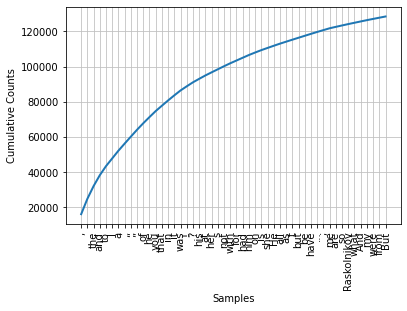

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [27]:
frequency_distribution.plot(50, cumulative=True)

Generate a list of the number of occurrences of each word type, in decreasing order, from the `FreqDist` object.  Plot for the first 100 ranks the number of occurrences on the *y&nbsp;* axis and the rank of each value (1, 2, 3, ..., 100) on the *x&nbsp;* axis, using a log-log scale.  Add the plot of the function *y = a/x'b*, trying to set *a&nbsp;* and *b&nbsp;* so that the two lines are as close as possible (by trial and error, not using a formal method).  The behavior is in fact predicted by [Zipf's law](https://en.wikipedia.org/wiki/Zipf%27s_law).

C:\Users\Matthias\AppData\Local\Temp\ipykernel_25760\2256289858.py:4: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log([i for i in range(100)]), np.log([item[1] for item in most_common_words_sorted]), label='data')
C:\Users\Matthias\AppData\Local\Temp\ipykernel_25760\2256289858.py:5: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log([i for i in range(100)]), [np.log(450/(x)*80) for x in [i for i in range(1,101)]], label='approximation')


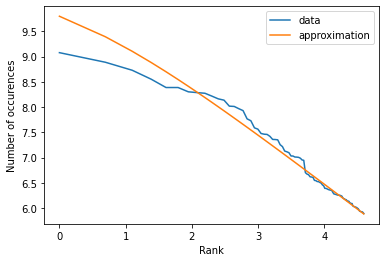

In [52]:
import numpy as np
most_common_words_sorted = sorted(frequency_distribution.most_common(100), key=lambda item: item[1], reverse=True)

plt.plot(np.log([i for i in range(100)]), np.log([item[1] for item in most_common_words_sorted]), label='data')
plt.plot(np.log([i for i in range(100)]), [np.log(450/(x)*80) for x in [i for i in range(1,101)]], label='approximation')
plt.xlabel("Rank")
plt.ylabel("Number of occurences")
plt.legend()


## Processing markup with Beautiful Soup
To extract text from an HTML or XML file, you can use the `BeautifulSoup` Python package.  Some examples are found in  [Chapter 3 of the NLTK book](http://www.nltk.org/book/ch03.html).  The simplest way is using `get_text`, but this will also get text from tables, image captions, etc. You can also check the 
[BeautifulSoup documentation](https://beautiful-soup-4.readthedocs.io/en/latest/) or tutorials [here](https://matix.io/extract-text-from-webpage-using-beautifulsoup-and-python/) or [here](https://www.pluralsight.com/guides/extracting-data-html-beautifulsoup).

In [53]:
from urllib import request # if needed
from bs4 import BeautifulSoup

In [54]:
# Sample code : extracted text is the "raw2" string.
url2 = "https://en.wikipedia.org/wiki/Switzerland" 
response2 = request.urlopen(url2)
html2 = response2.read().decode('utf8')
raw2 = BeautifulSoup(html2).get_text()

**What are the number of tokens, types and TTR** of the Wikipedia page at `url2`?

In [55]:
beautiful_soup_tokens = nltk.word_tokenize(raw2)
beautiful_soup_types = set([t for t in beautiful_soup_tokens])

print(f'Number of tokens: {len(beautiful_soup_tokens)}')
print(f'Number of types: {len(beautiful_soup_types)}')
print("TTR: ", len(beautiful_soup_types)/len(beautiful_soup_tokens))

Number of tokens: 30047
Number of types: 6262
TTR:  0.20840682930076215


## More advanced pre-processing options
Please read and experiment with the notebook `MSE_AnTeDe_TextPreprocessingDemo.ipynb`, where you will find more advanced pre-processing options:
1. a set of NLTK functions for lemmatization and stemming;
2. the in-house class `TextPreprocessing`;
3. gensim's `preprocess_documents` function.

The underlying definitions and methods of some of them will be presented in the following lessons of AnTeDe, and you will be able to use them in future lab work.

## End of AnTeDe Lab 1
Please rerun anew all cells via "Runtime > Restart and run all", save this completed notebook, compress it to a *zip* file, and upload it to Moodle.